## contents
### 01 import libraries
### 02 import data
### 03 change data types
#### a) change int64 and float64 to smaller values if it will not lose numeric value
#### b) create new df using records where visibility is <= 100mi. (eliminating 12 records)
### 04 visualizations
#### a) correlation matrix heatmap (colored)
#### b) scatterplot(s)
#### c) pair plot w/ entire dataset
#### d) categorical plot

# 01 import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 import data

In [2]:
#create path
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [3]:
#import clean data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged.csv'), index_col = False)

# 03 change data types
a) numeric values are evaluated so that data are not compromised, but may be faster to work with on visualizations
b) change column names to remove ambiguity after being merged
c) use records where visibility is <= 100mi. (eliminating 12 records)
d) export cleaned data

In [4]:
df.shape

(5153662, 23)

In [5]:
df.describe(include='all')

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,type,name,latitude_deg,longitude_deg
count,5153662,5.153662e+06,5.153662e+06,5.153662e+06,5.153662e+06,5153662,5153662,5153662,5153662,5153662,...,5153662,5.153662e+06,5153662,5153662,5153662,5.153662e+06,5153662,5153662,5.153662e+06,5.153662e+06
unique,5153662,NaN,NaN,NaN,NaN,13381,1847,49,4,1874,...,18,NaN,108,1611740,1881548,NaN,5,1846,NaN,NaN
top,C-2,NaN,NaN,NaN,NaN,Phoenix,Maricopa,FL,US/Eastern,KPHX,...,CALM,NaN,Fair,2021-02-16 05:41:49,2021-02-16 19:08:41,NaN,small_airport,Phoenix Sky Harbor International Airport,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,245868,344589,734571,2614757,183097,...,888129,NaN,2288709,1296,1599,NaN,1892381,183097,NaN,NaN
mean,NaN,2.258540e+00,3.707710e+01,-9.188944e+01,1.355767e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.764264e-03,NaN,NaN,NaN,5.128151e+04,NaN,NaN,3.707535e+01,-9.188983e+01
std,NaN,6.317708e-01,5.666324e+00,1.594532e+01,4.092732e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,4.926363e-02,NaN,NaN,NaN,2.942521e+04,NaN,NaN,5.663796e+00,1.595180e+01
min,NaN,1.000000e+00,2.455045e+01,-1.245569e+02,4.657500e-05,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,1.001000e+03,NaN,NaN,2.455610e+01,-1.245630e+02
25%,NaN,2.000000e+00,3.346487e+01,-1.050013e+02,1.569348e-01,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,2.811700e+04,NaN,NaN,3.343430e+01,-1.050480e+02
50%,NaN,2.000000e+00,3.895644e+01,-8.625898e+01,3.725871e-01,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,4.727400e+04,NaN,NaN,3.896970e+01,-8.629440e+01
75%,NaN,2.000000e+00,4.123571e+01,-8.012046e+01,1.134753e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,8.022300e+04,NaN,NaN,4.126370e+01,-8.011110e+01


In [6]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,type,name,latitude_deg,longitude_deg
0,C-2,2,30.221331,-92.008625,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,CALM,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,30.205299,-91.987602
1,C-3,2,39.653153,-104.910224,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,WSW,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,39.701698,-104.751999
2,C-4,4,33.961506,-118.029339,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,CALM,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,33.872002,-117.980003
3,C-5,2,40.008734,-79.599696,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,SSW,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800
4,C-6,2,32.811618,-96.853139,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,SSE,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,32.847099,-96.851799


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153662 entries, 0 to 5153661
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   City               object 
 6   County             object 
 7   State              object 
 8   Timezone           object 
 9   Airport_Code       object 
 10  Weather_Timestamp  object 
 11  Temperature(F)     float64
 12  Visibility(mi)     float64
 13  Wind_Direction     object 
 14  Precipitation(in)  float64
 15  Weather_Condition  object 
 16  Start_Time_no_ext  object 
 17  End_Time_no_ext    object 
 18  Zipcode_no_ext     int64  
 19  type               object 
 20  name               object 
 21  latitude_deg       float64
 22  longitude_deg      float64
dtypes: float64(8), int64(2), object(13)
memory usage: 904.3+ MB


In [8]:
#change data type for integer and float variables to control size/memory
df = df.astype({
    'Severity': 'uint8',
    'Distance(mi)': 'float32',
    'Temperature(F)': 'float32', 
    'Visibility(mi)': 'float32',
    'Precipitation(in)': 'float32',
    'Zipcode_no_ext': 'uint32',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'latitude_deg': 'float32',
    'longitude_deg': 'float32'
})

In [9]:
#rename merged columns to remove ambiguity
df.rename(columns = {'type' : 'Airport_Type',
                    'name' : 'Airport_Name',
                    'latitude_deg' : 'Airport_Lat',
                    'longitude_deg' : 'Airport_Lng'}, 
                    inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153662 entries, 0 to 5153661
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           uint8  
 2   Start_Lat          float32
 3   Start_Lng          float32
 4   Distance(mi)       float32
 5   City               object 
 6   County             object 
 7   State              object 
 8   Timezone           object 
 9   Airport_Code       object 
 10  Weather_Timestamp  object 
 11  Temperature(F)     float32
 12  Visibility(mi)     float32
 13  Wind_Direction     object 
 14  Precipitation(in)  float32
 15  Weather_Condition  object 
 16  Start_Time_no_ext  object 
 17  End_Time_no_ext    object 
 18  Zipcode_no_ext     uint32 
 19  Airport_Type       object 
 20  Airport_Name       object 
 21  Airport_Lat        float32
 22  Airport_Lng        float32
dtypes: float32(8), object(13), uint32(1), uint8(1)
memory usage: 693.0+ MB


In [11]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,CALM,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,30.205299,-91.987602
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,WSW,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,39.701698,-104.751999
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,CALM,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,33.872002,-117.980003
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,SSW,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,SSE,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,32.847099,-96.851799


In [12]:
#look at max visibility values
df['Visibility(mi)'].value_counts(dropna = False).sort_index().tail(30)

10.5          3
11.0         31
12.0        247
13.0       5990
14.0          2
15.0       7228
16.0          7
17.0          1
19.0         53
20.0       6489
22.0          2
25.0        486
30.0       1751
35.0        104
40.0       1341
45.0         92
50.0       1213
58.0          1
60.0        232
65.0         42
70.0        304
75.0        663
80.0        343
90.0         57
98.0          4
100.0        58
101.0         8
215.0         2
2984.0        1
34007.0       1
Name: Visibility(mi), dtype: int64

In [13]:
#b) redefine df without super-high visibility values
#Visibility(mi) is limited here to under 100 miles, the 12 values over are omitted
df=df.loc[df['Visibility(mi)']<=100]

In [14]:
df.shape

(5153650, 23)

In [15]:
#export cleaned data
df.to_csv(os.path.join(path, '02 Data', 'Prepared', 'merged2.csv'), index = False)

# 04 visualizations

## a) correlation matrix heatmap (colored)

In [16]:
df1=df[['Severity', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)']]

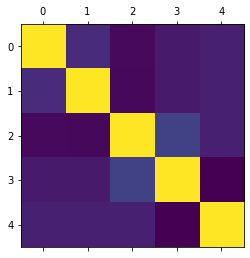

In [17]:
plt.matshow(df1.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

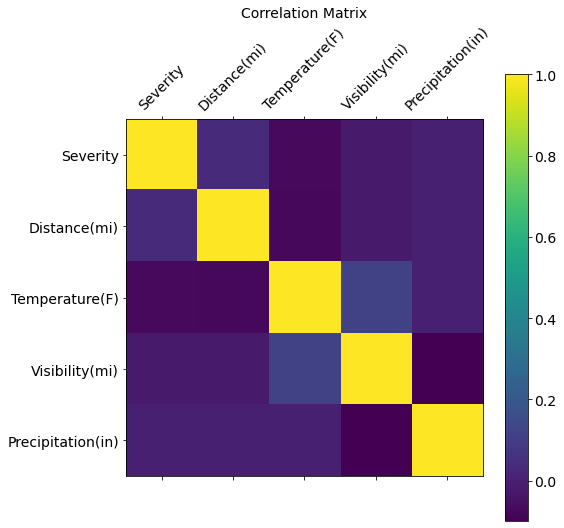

In [18]:
#show correlation matrix with increased size, added colorbar, labels, and title
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In the correlation matrix above, there does not seem to be a correlation between any of the weather factors, severity of the construction's impact on traffic, nor the distance of the construction (all boxes are dark blue).

## b) scatterplot(s)

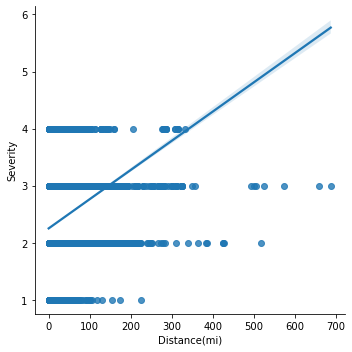

In [19]:
sns.lmplot(x = 'Distance(mi)', y = 'Severity', data = df1)

In [20]:
#creating a random sample with 70% of the data
np.random.seed(4)
dev = np.random.rand(len(df1)) <=0.7

In [21]:
#naming both samples 70% and 30%
big_70 = df1[dev]
small_30 = df1[~dev]

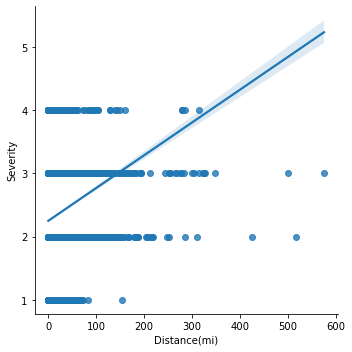

In [22]:
#create scatterplot with Distance & Severity with random 30% of data (small_30)
sns.lmplot(x = 'Distance(mi)', y = 'Severity', data = small_30)

In the scatterplot above, you can see that the construction distances are mostly short and does not have a strong correlation with severity of traffic implications.

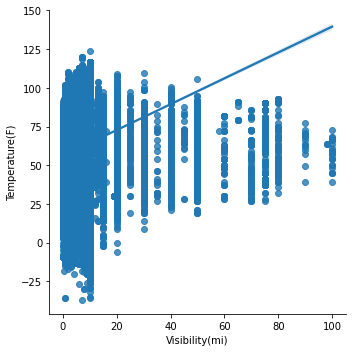

In [23]:
#create scatterplot with Visibility & Temperature with small_30
sns.lmplot(x = 'Visibility(mi)', y = 'Temperature(F)', data = small_30)

In the scatterplot above comparing Visibility and Temperature, as Visibility increased, the Temperature tended to a more average temperature (not too cold or too hot). Looking at the trend line, temperature values should be increasing as visibility increases, but this is not the case.

## c) pair plot using 30% of dataset

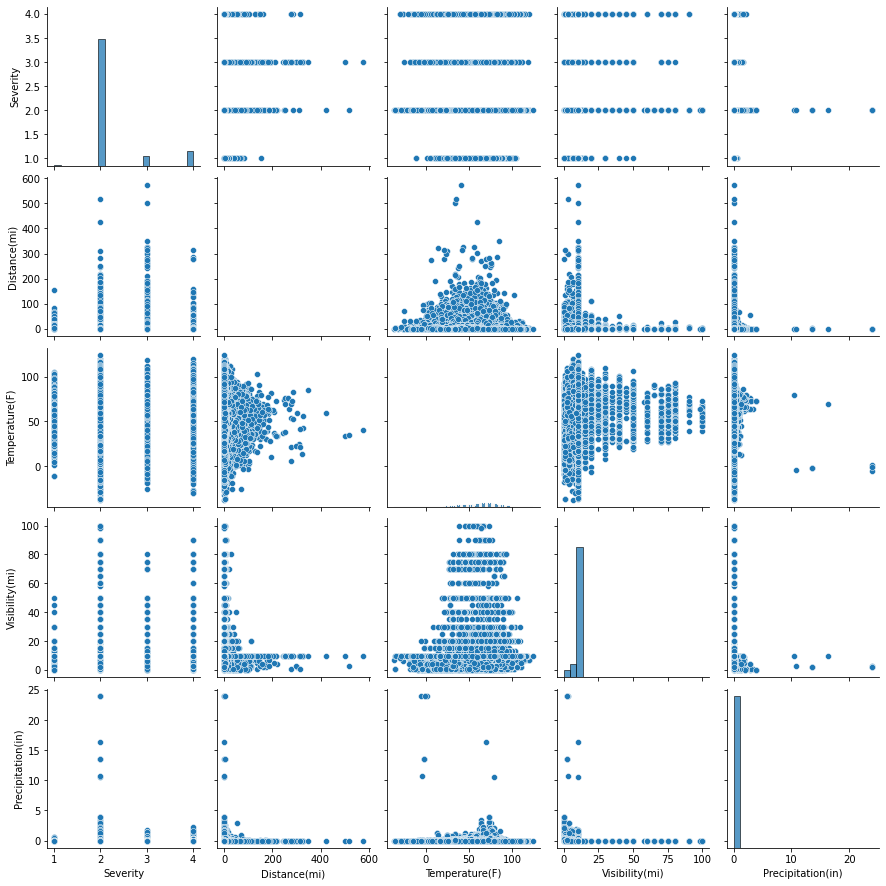

In [24]:
#create a pairplot with small_30
g = sns.pairplot(small_30)

The categorical variable (Severity) is very obvious, as the plot is way more structured. Precipitation, Visibility and Temperature all seem to have a relationship with Distance of the construction.

## d) categorical plot

In [25]:
#use visibility data to make categories
small_30.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in)
count,1.545023e+06,1.545023e+06,1.545023e+06,1.545023e+06,1.545023e+06
mean,2.258506e+00,1.355317e+00,6.389312e+01,9.452708e+00,2.822355e-03
std,6.317469e-01,4.082941e+00,1.781324e+01,2.460274e+00,5.590240e-02
min,1.000000e+00,4.658693e-05,-3.700000e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.568349e-01,5.200000e+01,1.000000e+01,0.000000e+00
50%,2.000000e+00,3.722588e-01,6.600000e+01,1.000000e+01,0.000000e+00
75%,2.000000e+00,1.134703e+00,7.700000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,5.749000e+02,1.240000e+02,1.000000e+02,2.400000e+01


In [26]:
df1.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in)
count,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06
mean,2.258540e+00,1.344019e+00,6.380623e+01,8.952274e+00,2.761149e-03
std,6.317709e-01,4.030754e+00,1.781520e+01,2.558197e+00,4.918816e-02
min,1.000000e+00,4.657500e-05,-3.700000e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.569342e-01,5.200000e+01,1.000000e+01,0.000000e+00
50%,2.000000e+00,3.725871e-01,6.600000e+01,1.000000e+01,0.000000e+00
75%,2.000000e+00,1.134753e+00,7.700000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,6.877400e+02,1.270000e+02,1.000000e+02,2.400000e+01


<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

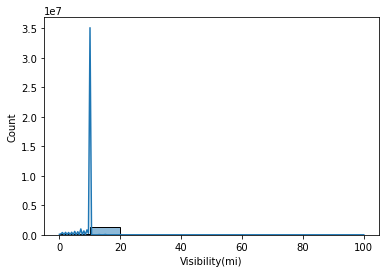

In [27]:
sns.histplot(small_30['Visibility(mi)'], bins = 10, kde = True)

Visibility levels were derived from the following website: https://www.renkeer.com/product/atmospheric-visibility-sensor/
This is a product that measures visiblility.

In [28]:
#less than 100 m is generally recognized as 0 m visibility
small_30.loc[small_30['Visibility(mi)'] <=0.0621, 'Visibility_range'] = 'No Visibility'

C:\Users\erhil\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\erhil\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
# greater than 100 m and less than 1km is recognized as poor to extremely poor visibility (heavy to thick fog)
small_30.loc[(small_30['Visibility(mi)'] > 0.0621) & (small_30['Visibility(mi)'] <=0.62137), 'Visibility_range'] = 'Limited'

In [30]:
# greater than 1km and less than 15km, visibility is unclear to clear (light fog to average)
small_30.loc[(small_30['Visibility(mi)']>0.62137) &(small_30['Visibility(mi)']<9.3205), 'Visibility_range'] = 'Good'

In [31]:
# greater than 15km is good to perfect visibility/ over 10 miles is perfect with meteorologists
#
small_30.loc[small_30['Visibility(mi)'] >= 9.3205, 'Visibility_range'] = 'Excellent'

In [32]:
small_30['Visibility_range'].value_counts(dropna = False)

Excellent        1338428
Good              195222
Limited            10086
No Visibility       1287
Name: Visibility_range, dtype: int64

In [33]:
small_30.head()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),Visibility_range
0,2,0.433173,55.0,3.0,0.0,Good
2,4,0.032112,54.0,9.0,0.0,Good
3,2,0.996057,73.0,10.0,0.0,Excellent
6,2,0.073240,61.0,10.0,0.0,Excellent
10,2,0.192480,81.0,10.0,0.0,Excellent


In [34]:
small_30.shape

(1545023, 6)

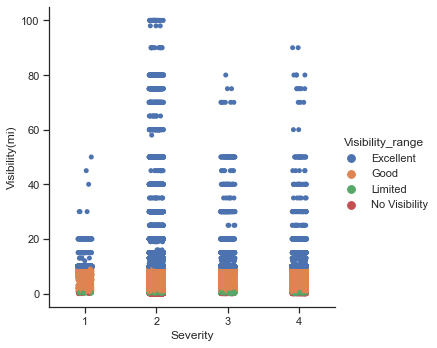

In [35]:
sns.set(style = 'ticks')
g = sns.catplot(x = 'Severity', y = 'Visibility(mi)', hue='Visibility_range', hue_order=['Excellent', 'Good', 'Limited', 'No Visibility'], data = small_30)

For the categorical plot, I chose to categorize visibility ranges. In this diagram, my categories are the Severity levels (of the Construction's impact on traffic conditions) mapped with the Distance in Visibility on the road. The days with greatest visibility were the days that construction began with the "Level 2" of Severity impact on traffic. Overall, it seems that the severity of impact on traffic goes up with the visibility distance. 